# <center>Kiss Dániel Márk</center>
## <center>WP871Q</center>

# Library import

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score

# Data import

In [82]:
df_verseny_public_train = pd.read_csv('data/verseny_public_train.csv', sep=',', low_memory=False)

# Data familirsation

In [83]:
df_verseny_public_train

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
0,100000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,8,57,0,0,15,43,0,...,0,0,0,0,0,0,0,0,0,0
2,100002,0,0,0,0,8,50,8,50,0,...,0,0,0,0,0,0,0,0,0,0
3,100003,15,15,8,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100004,0,0,8,15,0,0,15,15,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,0,0,0,0,127,1,8,1,22,...,0,0,0,0,0,0,0,0,0,0
99996,199996,50,8,0,0,57,1,50,8,50,...,0,0,0,0,0,0,0,0,0,0
99997,199997,15,127,0,0,22,1,71,120,8,...,0,0,0,0,0,0,0,0,0,0
99998,199998,8,8,0,0,43,1,8,64,8,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df_verseny_public_train.describe()

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.000000
mean,149999.500000,8.798000,16.085980,1.066320,7.923940,19.105870,8.563590,15.600520,23.712400,4.927330,...,0.002190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015000
std,28867.657797,23.308133,48.515646,5.824816,50.279646,42.710725,40.371399,31.981042,54.356458,17.719046,...,0.501804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121553
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,124999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,149999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,174999.250000,8.000000,8.000000,0.000000,0.000000,22.000000,1.000000,15.000000,22.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,199999.000000,477.000000,1548.000000,610.000000,1576.000000,631.000000,1506.000000,603.000000,1632.000000,512.000000,...,134.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [85]:
df_verseny_public_train.columns

Index(['cookie_id', 'Topic1_ic', 'Topic1_ec', 'Topic2_ic', 'Topic2_ec',
       'Topic3_ic', 'Topic3_ec', 'Topic4_ic', 'Topic4_ec', 'Topic5_ic',
       ...
       'Topic177_ec', 'Topic178_ic', 'Topic178_ec', 'Topic179_ic',
       'Topic179_ec', 'Topic180_ic', 'Topic180_ec', 'Topic181_ic',
       'Topic181_ec', 'target'],
      dtype='object', length=258)

# Feature importance

## Decision Tree

Feature ranking:
1. Feature 59 (0.036396) Topic42_ec
2. Feature 17 (0.032081) Topic12_ec
3. Feature 82 (0.026194) Topic63_ic
4. Feature 7 (0.025537) Topic4_ec
5. Feature 68 (0.024461) Topic55_ic
6. Feature 83 (0.023840) Topic63_ec
7. Feature 6 (0.023261) Topic4_ic
8. Feature 66 (0.022736) Topic54_ic
9. Feature 61 (0.021530) Topic51_ec
10. Feature 71 (0.020799) Topic56_ec
11. Feature 16 (0.020044) Topic12_ic
12. Feature 29 (0.019590) Topic19_ec
13. Feature 28 (0.019004) Topic19_ic
14. Feature 19 (0.018674) Topic13_ec
15. Feature 70 (0.017609) Topic56_ic
16. Feature 18 (0.017217) Topic13_ic
17. Feature 63 (0.015401) Topic52_ec
18. Feature 21 (0.015172) Topic14_ec
19. Feature 11 (0.013808) Topic8_ec
20. Feature 69 (0.013372) Topic55_ec
21. Feature 20 (0.012505) Topic14_ic
22. Feature 135 (0.012382) Topic99_ec
23. Feature 12 (0.011326) Topic9_ic
24. Feature 35 (0.011060) Topic24_ec
25. Feature 4 (0.011023) Topic3_ic
26. Feature 22 (0.010905) Topic15_ic
27. Feature 14 (0.010839) Topic10_ic


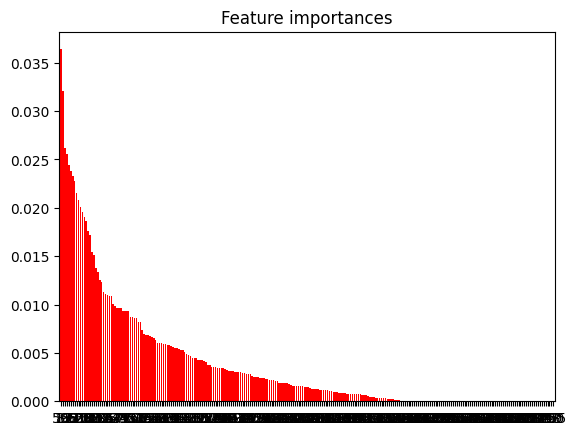

In [86]:
X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random forest

Feature ranking:
1. Feature 7 (0.024804) Topic4_ec
2. Feature 68 (0.023238) Topic55_ic
3. Feature 17 (0.023111) Topic12_ec
4. Feature 82 (0.022345) Topic63_ic
5. Feature 6 (0.021954) Topic4_ic
6. Feature 21 (0.021646) Topic14_ec
7. Feature 19 (0.021244) Topic13_ec
8. Feature 83 (0.020904) Topic63_ec
9. Feature 16 (0.020876) Topic12_ic
10. Feature 18 (0.020782) Topic13_ic
11. Feature 71 (0.020308) Topic56_ec
12. Feature 20 (0.020149) Topic14_ic
13. Feature 70 (0.019304) Topic56_ic
14. Feature 59 (0.019297) Topic42_ec
15. Feature 66 (0.017296) Topic54_ic
16. Feature 4 (0.017159) Topic3_ic
17. Feature 61 (0.016681) Topic51_ec
18. Feature 67 (0.015899) Topic54_ec
19. Feature 69 (0.015780) Topic55_ec
20. Feature 29 (0.014929) Topic19_ec
21. Feature 28 (0.013446) Topic19_ic
22. Feature 1 (0.011894) Topic1_ec
23. Feature 12 (0.011718) Topic9_ic
24. Feature 35 (0.011484) Topic24_ec
25. Feature 87 (0.011228) Topic65_ec
26. Feature 57 (0.010889) Topic41_ec
27. Feature 22 (0.010797) Topic15_ic
28

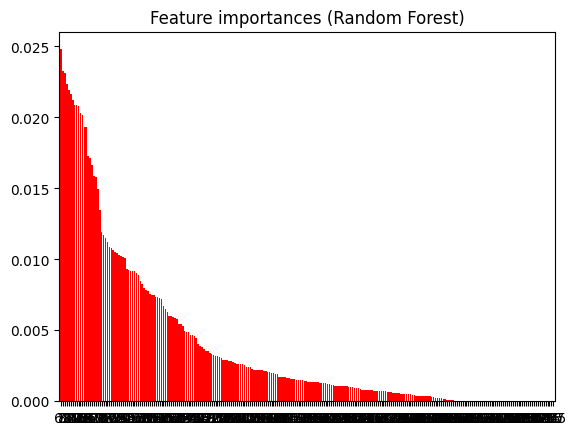

In [87]:
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)


importances_rf = clf_rf.feature_importances_


indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]], X.columns[indices_rf[f]]))

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()

In [88]:
# Create DataFrames for feature importances
dt_feature_importances = pd.DataFrame({'Feature': indices, 'Importance_DT': importances[indices]})
rf_feature_importances = pd.DataFrame({'Feature': indices_rf, 'Importance_RF': importances_rf[indices_rf]})

# Merge DataFrames on the 'Feature' column
merged_feature_importances = pd.merge(dt_feature_importances, rf_feature_importances, on='Feature')

print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
     Feature  Importance_DT  Importance_RF
0         59       0.036396   1.929697e-02
1         17       0.032081   2.311080e-02
2         82       0.026194   2.234496e-02
3          7       0.025537   2.480388e-02
4         68       0.024461   2.323808e-02
..       ...            ...            ...
251      217       0.000000   0.000000e+00
252      218       0.000000   0.000000e+00
253      219       0.000000   0.000000e+00
254      220       0.000000   4.921157e-07
255      255       0.000000   0.000000e+00

[256 rows x 3 columns]


In [89]:
percentile_threshold = 0.8

importance_threshold_dt = merged_feature_importances['Importance_DT'].quantile(percentile_threshold)
importance_threshold_rf = merged_feature_importances['Importance_RF'].quantile(percentile_threshold)

print("Threshold value based on the top", int(percentile_threshold * 100), "percentileDT:", importance_threshold_dt, "percentileRF:", importance_threshold_rf)


Threshold value based on the top 80 percentileDT: 0.006048792663398977 percentileRF: 0.00724468686007456


In [90]:
merged_feature_importances = merged_feature_importances[(merged_feature_importances['Importance_DT'] > importance_threshold_dt) & (merged_feature_importances['Importance_RF'] > importance_threshold_rf)]
print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
    Feature  Importance_DT  Importance_RF
0        59       0.036396       0.019297
1        17       0.032081       0.023111
2        82       0.026194       0.022345
3         7       0.025537       0.024804
4        68       0.024461       0.023238
5        83       0.023840       0.020904
6         6       0.023261       0.021954
7        66       0.022736       0.017296
8        61       0.021530       0.016681
9        71       0.020799       0.020308
10       16       0.020044       0.020876
11       29       0.019590       0.014929
12       28       0.019004       0.013446
13       19       0.018674       0.021244
14       70       0.017609       0.019304
15       18       0.017217       0.020782
16       63       0.015401       0.010427
17       21       0.015172       0.021646
18       11       0.013808       0.010120
19       69       0.013372       0.015780
20       20       0.012505       0.020149
22       12       0.011326       0.011718
23    

In [91]:
X = X.drop(X.columns.difference(X.columns[merged_feature_importances['Feature']]), axis=1)


In [92]:
len(X.columns)

44

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell building

In [94]:
#random forest model
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy (Random Forest):", accuracy_rf)

Accuracy (Random Forest): 0.9851


# Test set

In [95]:
df_verseny_public_test = pd.read_csv('data/verseny_public_test.csv', sep=',', low_memory=False)

In [96]:
#prediction output like this
"""cookie_id,P1
300000,0.006936655528409391
300001,0.00527454177592661
300002,0.011525348288803432
300003,0.005810514691014177
300004,0.033702118420699805
300005,0.00527454177592661
300006,0.00527454177592661"""

X_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

X_test = X_test.drop(X_test.columns.difference(X.columns), axis=1)

# target value should be a probability score between 0 and 1

y_pred_rf = clf_rf.predict_proba(X_test)[:, 1]

df_verseny_public_test['target'] = y_pred_rf

# in the csv i only need cookie id and target

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/verseny_public_test_prediction.csv', index=False)